In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
grade_df=pd.read_csv('archive/student-por.csv')
grade_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
grade_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Medu,Fedu, famrel, goout, Dalc, Walc, health are supposed to be categorical

In [7]:
grade_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
numeric_df=grade_df.drop(columns=['school','sex','address','famsize','Pstatus','Medu','Fedu','Fjob','Mjob','reason','guardian','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health'])
numeric_df

,age,traveltime,failures,absences,G1,G2,G3
0,18,2,0,4,0,11,11
1,17,1,0,2,9,11,11
2,15,1,0,6,12,13,12
3,15,1,0,0,14,14,14
4,16,1,0,0,11,13,13
...,...,...,...,...,...,...,...
644,19,1,1,4,10,11,10
645,18,1,0,4,15,15,16
646,18,2,0,6,11,12,9
647,17,2,0,6,10,10,10


In [14]:
numeric_df.corr()

,age,traveltime,failures,absences,G1,G2,G3
age,1.000000,0.034490,0.319968,0.149998,-0.174322,-0.107119,-0.106505
traveltime,0.034490,1.000000,0.097730,-0.008149,-0.154120,-0.154489,-0.127173
failures,0.319968,0.097730,1.000000,0.122779,-0.384210,-0.385782,-0.393316
absences,0.149998,-0.008149,0.122779,1.000000,-0.147149,-0.124745,-0.091379
G1,-0.174322,-0.154120,-0.384210,-0.147149,1.000000,0.864982,0.826387
G2,-0.107119,-0.154489,-0.385782,-0.124745,0.864982,1.000000,0.918548
G3,-0.106505,-0.127173,-0.393316,-0.091379,0.826387,0.918548,1.000000


<AxesSubplot:>

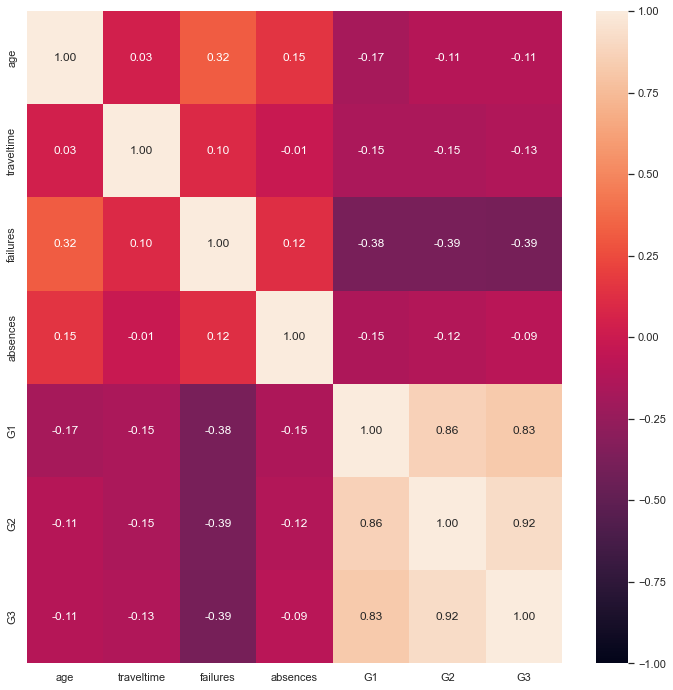

In [16]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(numeric_df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Alcohol consumption on weekday

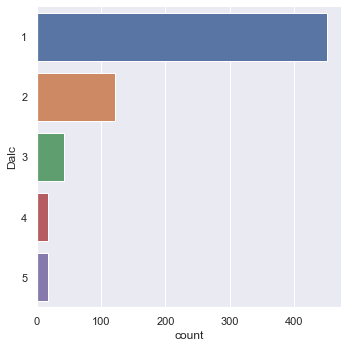

In [4]:
sb.catplot(y = 'Dalc', data = grade_df, kind = "count")

# Alcohol consumption on weekend

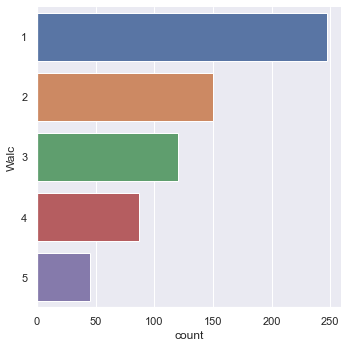

In [5]:
sb.catplot(y = 'Walc', data = grade_df, kind = "count")